In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import scipy.optimize as opt
from scipy.optimize import curve_fit
import os
import re


In [2]:
def powerlaw(t,K,n,Af,tau):
    return Af*(1-np.exp(-K*np.power(t+tau,n)/Af))#/Af))


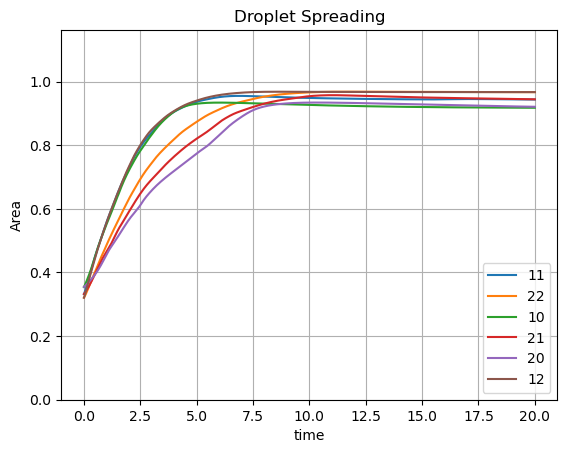

In [3]:
file_temp=next(os.walk('.'))[1]
cst=0
f_name=[""]
f_id=[""]
for temp in file_temp:
    match=re.search("data2_*",temp)
    if match:
        f_name.append(temp)
        f_id.append(temp.split('_')[1])
        f_id.append(temp.split('_')[2])
        
        cst=cst+1
f_name=np.array(f_name[1:])#,dtype=np.str)
f_id=np.array(f_id[1:],dtype=np.float32)
f_sorted=np.sort(f_id)
index=np.zeros(np.size(f_id)).astype('int32')
f_name_sorted=np.empty(np.size(f_name),dtype='<U14')
for i in range(np.size(f_id)):
    index[i]=np.where(f_id==f_sorted[i])[0][0].astype('int32')#,f_id)
    #f_name_sorted[i]=f_name[index[i]]
n=np.size(f_id)
fit_param=np.zeros([n,4])
i=0
for f in f_name:
    temp=pd.read_csv('./'+f+'/dropinfo',header=0,delimiter='\\s+')#,skiprows=1)
    data=temp[1:].astype('float32') # Drop first row and interpret data as floating point numbers. 
    # === Plot Data === #
    xdata=data['Time'].to_numpy()
    ydata=data['WetAreaFract'].to_numpy()
    p=plt.plot(xdata,ydata,label=f.split('_')[1]+f.split('_')[3])
    # === Fit model === #
    #popt, pcov = curve_fit(powerlaw, data['Time'], np.pi*np.power(data['Wetted'],2),[1,0.5,1,8])
    popt, pcov = curve_fit(powerlaw, xdata, ydata,bounds=(10**-3,[10,10,10,2]))
    fit_param[i,:]=popt
    #p=plt.plot(xdata,powerlaw(xdata,popt[0],popt[1],popt[2],popt[3]),'--',color=p[0].get_color())
    i=i+1

plt.ylim([0,np.max(ydata)*1.2])
plt.title('Droplet Spreading')
plt.xlabel('time')
plt.ylabel('Area')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# K,n,Af,tau
a=plt.plot(np.log10(f_id),fit_param[:,0]/np.max(fit_param[:,0]),'-o',label='K')
a=plt.plot(np.log10(f_id),fit_param[:,1]/np.max(fit_param[:,1]),'-o',label='n')
a=plt.plot(np.log10(f_id),fit_param[:,2]/np.max(fit_param[:,2]),'-o',label='Af')
a=plt.plot(np.log10(f_id),fit_param[:,3]/np.max(fit_param[:,3]),'-o',label='tau')
plt.title('beta')
plt.xlabel('log beta')
plt.ylabel('normalized fit variables')
plt.legend()

plt.grid()
plt.show()

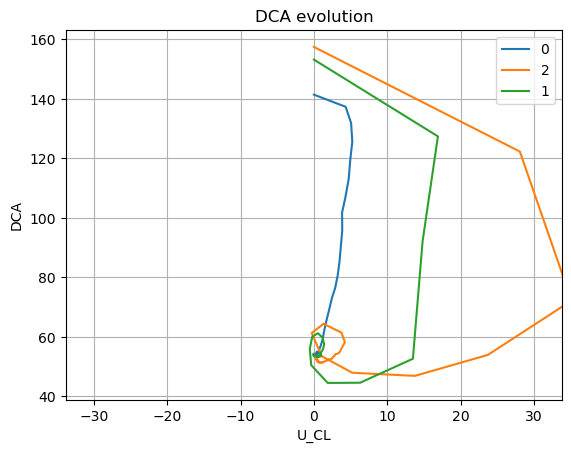

In [17]:
for f in f_name:
    temp=pd.read_csv('./'+f+'/dropinfo',header=0,delimiter='\\s+')#,skiprows=1)
    data=temp[1:].astype('float32') # Drop first row and interpret data as floating point numbers. 
    xdata=data['CL'].to_numpy()
    ydata=data['CA.1'].to_numpy()
    p=plt.plot(xdata,ydata,label=f.split('_')[3])
    plt.legend()
    plt.title('DCA evolution')
    plt.xlabel('U_CL')
    plt.ylabel('DCA')
    plt.xlim([-2*np.max(xdata),2*np.max(xdata)])
    plt.grid()
plt.show()
    

In [4]:
data

,Timestep,Time,VOFmax,VOFmin,Totalvol,Dropheight,WetAreaFract,VoF_WF,CL,CA,CA.1,C,alpha
1,0.0,0.000000,1.0,0.0,4.18808,1.85300,0.354473,0.416599,0.000000,2.24501,128.630005,0.354473,0.000000
2,1.0,0.010000,1.0,0.0,4.18864,1.85300,0.355069,0.416932,0.059601,2.24294,128.511002,0.357824,0.001679
3,2.0,0.020000,1.0,0.0,4.18924,1.85301,0.355718,0.417296,0.064868,2.24070,128.382996,0.360829,0.003647
4,3.0,0.030000,1.0,0.0,4.18983,1.85301,0.356381,0.417668,0.066370,2.23838,128.250000,0.363432,0.005587
5,4.0,0.040000,1.0,0.0,4.19042,1.85301,0.357059,0.418046,0.067751,2.23601,128.113998,0.365889,0.007590
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,1996.0,19.959999,1.0,0.0,4.18519,1.05301,0.920637,0.875387,-0.001114,1.04368,59.798302,0.989670,-0.024153
1998,1997.0,19.969999,1.0,0.0,4.18518,1.05303,0.920626,0.875378,-0.001113,1.04370,59.799599,0.989624,-0.024137
1999,1998.0,19.980000,1.0,0.0,4.18517,1.05304,0.920615,0.875369,-0.001111,1.04372,59.800800,0.989577,-0.024121
2000,1999.0,19.990000,1.0,0.0,4.18516,1.05306,0.920603,0.875361,-0.001110,1.04374,59.802101,0.989530,-0.024105


In [18]:
np.max(ydata)

np.float32(70000.44)

In [36]:
# K,n,Af,tau
fit_param

array([[5.30037902e-01, 6.30834679e-01, 3.59550164e+00, 3.42524170e-02],
       [2.03964475e-01, 2.13751348e+00, 7.74362696e+00, 6.95567387e-01],
       [1.49548545e+00, 1.46967570e+00, 8.10311914e+00, 1.00000000e-03],
       [4.49041604e+00, 1.05884132e+00, 8.29380617e+00, 1.00000000e-03],
       [5.97011383e+00, 8.81841051e-01, 8.38774281e+00, 1.07507007e-02]])

In [40]:
f_sorted

array([0.05, 0.1 , 0.2 , 0.4 , 0.6 , 0.8 , 1.  , 5.  ], dtype=float32)

In [18]:
f_name


array(['monitor2_0.3', 'monitor2_0.05', 'monitor2_0.01', 'monitor2_0.1',
       'monitor2_1'], dtype='<U13')